In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [19]:
#load data from pkl files
def data_load(code = 0):
    return pd.read_pickle('event_'+str(code)+'_data.pkl')
#load data from all dataset
data_modified = pd.read_csv('dataset_modified.csv')

In [20]:
#each day each activity
def train_data_prepare(code = 0):
    data = data_load(code)
    text = data['location'].iloc[0]
    #event list
    begin_point = data['BE'].str.contains('begin').fillna(False)
    end_point   = data['BE'].str.contains('end').fillna(False)

    index_begin         = data.loc[begin_point].index
    index_end           = data.loc[end_point].index
    only_event_begin    = data.loc[index_begin]
    only_event_end      = data.loc[index_end]

    event_begin         = only_event_begin.loc[data['location'].str.contains(data.head(1)['location'].values[0]).fillna(False)]
    event_end           = only_event_end.loc[data['location'].str.contains(data.head(1)['location'].values[0]).fillna(False)]

    return event_begin,event_end,text

In [21]:
code = 8
b,e,data_t = train_data_prepare(code)

In [22]:
#duration
time_list = b['date'].unique()
day_list = []
for i in time_list:
    day_time = b.loc[b['date'].str.contains(i)]['duration'].sum()
    day_list.append(day_time)
    pass

#date
date_list = []
for i in range(len(time_list)):
    date_list.append(dt.datetime.strptime(time_list[i], "%d/%m/%Y").date())
    pass

In [23]:
min = pd.Series(day_list) / np.timedelta64(60, 's')
data_y = min
data_x = date_list

In [24]:
import july
from july.utils import date_range
dates = date_range("2009-02-02", "2009-4-4")

<AxesSubplot:title={'center':'R1_Sleep'}>

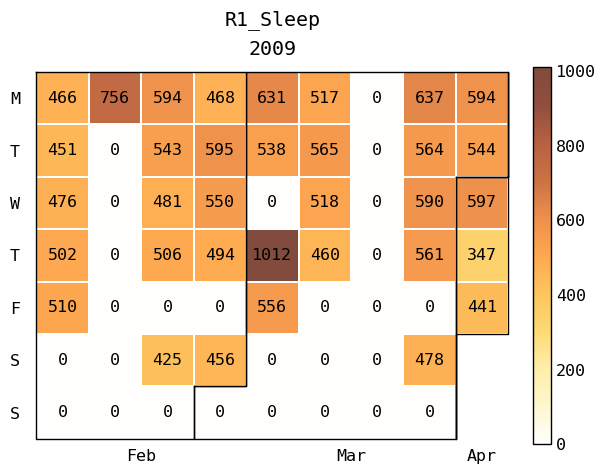

In [25]:
july.heatmap(data_x,data_y, title=data_t, cmap="golden",value_label=True,colorbar=True,month_grid=True)

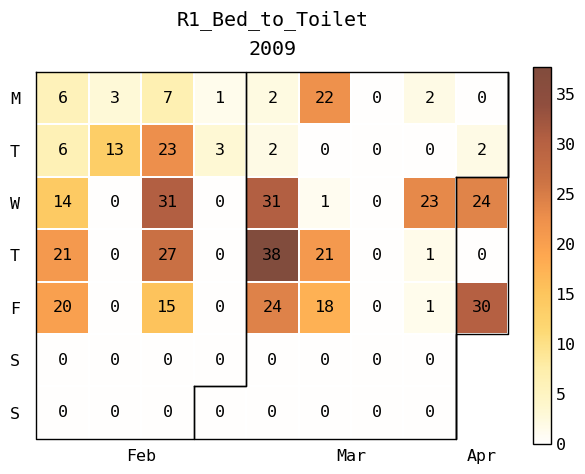

In [28]:
code = 0
b,e,data_t = train_data_prepare(code)
#duration
time_list = b['date'].unique()
day_list = []
for i in time_list:
    day_time = b.loc[b['date'].str.contains(i)]['duration'].sum()
    day_list.append(day_time)
    pass

#date
date_list = []
for i in range(len(time_list)):
    date_list.append(dt.datetime.strptime(time_list[i], "%d/%m/%Y").date())
    pass

min = pd.Series(day_list) / np.timedelta64(60, 's')
data_y = min
data_x = date_list

import july
from july.utils import date_range
dates = date_range("2009-02-02", "2009-4-4")\

july.heatmap(data_x,data_y, title=data_t, cmap="golden",value_label=True,colorbar=True,month_grid=True)

plt.savefig('july_d.jpg')

In [35]:
#below are not general plot

In [39]:
timeline = pd.read_pickle('freq.pkl')
timeline.index
timeline.columns

Index(['Meal_Preparation', 'R2_Personal_Hygiene', 'R1_Work',
       'R1_Bed_to_Toilet', 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Watch_TV', 'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study'],
      dtype='object')

In [63]:
code = 0
b,e,data_t = train_data_prepare(code)
#duration
time_list = b['date'].unique()
day_list = []
for i in time_list:
    day_time = b.loc[b['date'].str.contains(i)]['duration'].sum()
    day_list.append(day_time)
    pass

#date
date_list = []
for i in range(len(time_list)):
    date_list.append(dt.datetime.strptime(time_list[i], "%d/%m/%Y").date())
    pass

min = pd.Series(day_list) / np.timedelta64(60, 's')
data_y = min
data_x = date_list

dura_temp = pd.DataFrame(data_y)
dura_temp.index = data_x
dura_temp.columns=[data_t]


In [65]:
dura = pd.DataFrame(index=timeline.index,columns=timeline.columns)

In [66]:
for i in range(13):
    code = i
    b,e,data_t = train_data_prepare(code)
    #duration
    time_list = b['date'].unique()
    day_list = []
    for i in time_list:
        day_time = b.loc[b['date'].str.contains(i)]['duration'].sum()
        day_list.append(day_time)
        pass

    #date
    date_list = []
    for i in range(len(time_list)):
        date_list.append(dt.datetime.strptime(time_list[i], "%d/%m/%Y").date())
        pass

    min = pd.Series(day_list) / np.timedelta64(60, 's')
    data_y = min
    data_x = date_list

    dura_temp = pd.DataFrame(data_y)
    dura_temp.index = data_x
    dura_temp.columns=[data_t]
    dura[data_t] = dura_temp
    pass

In [76]:
dura = dura.fillna(0)
dura.to_pickle('dura.pkl')

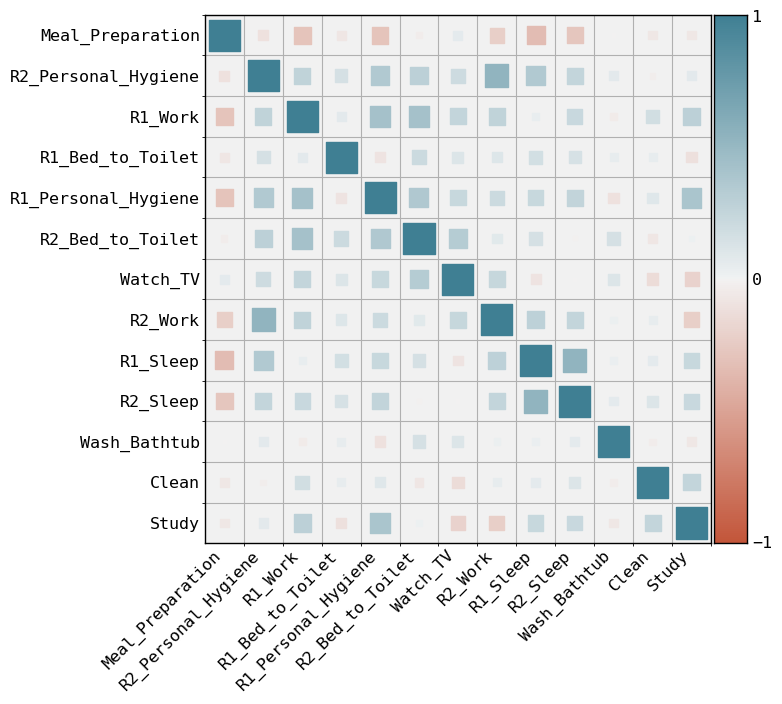

In [72]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(7,7))
corrplot(dura.corr())

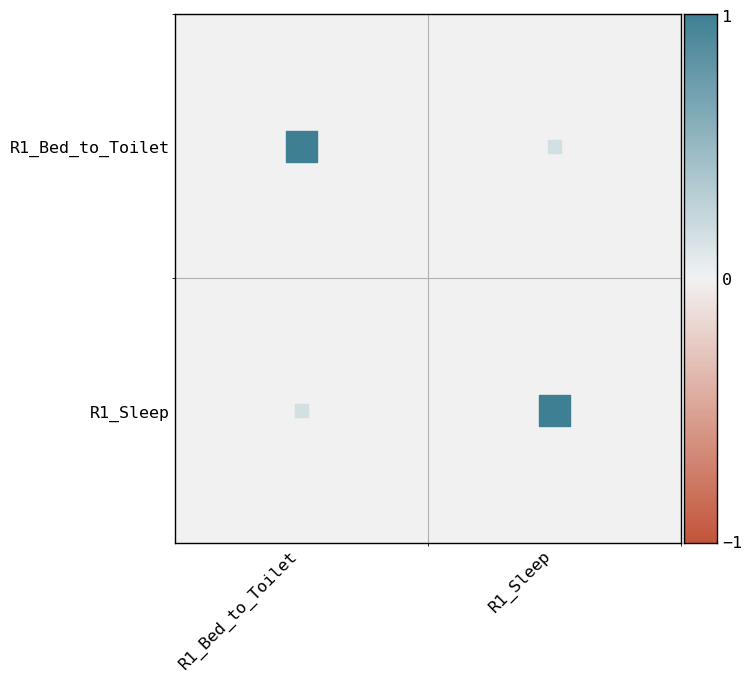

In [75]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(7,7))
corrplot(dura.loc[:,['R1_Bed_to_Toilet','R1_Sleep']].corr())